<a href="https://colab.research.google.com/github/celefigs/collaborative_project/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import math
import matplotlib.pyplot as plt

In [5]:
file_path = '../data/drugsComTrain.csv'

drug_data_df=pd.read_csv(file_path)

drug_data_df.head()

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,3-Nov-15,10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37


In [6]:
drug_data_df.shape 

(161297, 7)

In [7]:
drug_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161297 entries, 0 to 161296
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   uniqueID     161297 non-null  int64 
 1   drugName     161297 non-null  object
 2   condition    160398 non-null  object
 3   review       161297 non-null  object
 4   rating       161297 non-null  int64 
 5   date         161297 non-null  object
 6   usefulCount  161297 non-null  int64 
dtypes: int64(3), object(4)
memory usage: 8.6+ MB


In [8]:
#remove column "UniqueID"

drug_data_df=drug_data_df.drop(columns=['uniqueID'])

drug_data_df.head(2)

,drugName,condition,review,rating,date,usefulCount
0,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27
1,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192


In [9]:
#search related words in a "condition" column and create a new DataFrame with only the relevant conditions

pattern = r'birth|birth control|contraception|contraceptive methods|birth control pills|birth control devices|family planning|pregnancy|newborn'

filtered_df = drug_data_df[drug_data_df['condition'].str.contains(pattern, case=False, na=False)]

filtered_df.head()

,drugName,condition,review,rating,date,usefulCount
2,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17
3,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,3-Nov-15,10
6,Levonorgestrel,Emergency Contraception,"""He pulled out, but he cummed a bit in me. I t...",1,7-Mar-17,5
9,Ethinyl estradiol / levonorgestrel,Birth Control,"""I had been on the pill for many years. When m...",8,8-Dec-16,1
14,Nexplanon,Birth Control,"""Started Nexplanon 2 months ago because I have...",3,7-Aug-14,10


In [10]:
filtered_df.shape #reduce the rows 129846

The related conditions are: Birth Control, Emergency Contraception, Nausea/Vomiting of Pregnancy, Vitamin/Mineral Supplementation during Pregnancy/Lactation, Ectopic Pregnancy


Total unique related conditions: 5
<class 'pandas.core.frame.DataFrame'>
Index: 31451 entries, 2 to 161291
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   drugName     31451 non-null  object
 1   condition    31451 non-null  object
 2   review       31451 non-null  object
 3   rating       31451 non-null  int64 
 4   date         31451 non-null  object
 5   usefulCount  31451 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 1.7+ MB


In [15]:
formatted_conditions = ', '.join(filtered_df['condition'].unique())

print(f"The related conditions are: {formatted_conditions}")
print("\n") 
print(f"Total unique related conditions: {filtered_df['condition'].nunique()}")

filtered_df.info()

The related conditions are: Birth Control, Emergency Contraception, Nausea/Vomiting of Pregnancy, Vitamin/Mineral Supplementation during Pregnancy/Lactation, Ectopic Pregnancy


Total unique related conditions: 5
<class 'pandas.core.frame.DataFrame'>
Index: 31451 entries, 2 to 161291
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   drugName     31451 non-null  object
 1   condition    31451 non-null  object
 2   review       31451 non-null  object
 3   rating       31451 non-null  int64 
 4   date         31451 non-null  object
 5   usefulCount  31451 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 1.7+ MB


In [16]:
#buscar nan values

nan_values = filtered_df.isna().sum()

print(nan_values)

drugName       0
condition      0
review         0
rating         0
date           0
usefulCount    0
dtype: int64


In [17]:
filtered_df.describe()

# rating: 6,28 media;
# std	3.33-> means diversity;
# rating goes from 1 to 10; 

,rating,usefulCount
count,31451.000000,31451.000000
mean,6.281231,8.235573
std,3.332012,17.616892
min,1.000000,0.000000
25%,3.000000,2.000000
50%,7.000000,5.000000
75%,9.000000,9.000000
max,10.000000,1247.000000


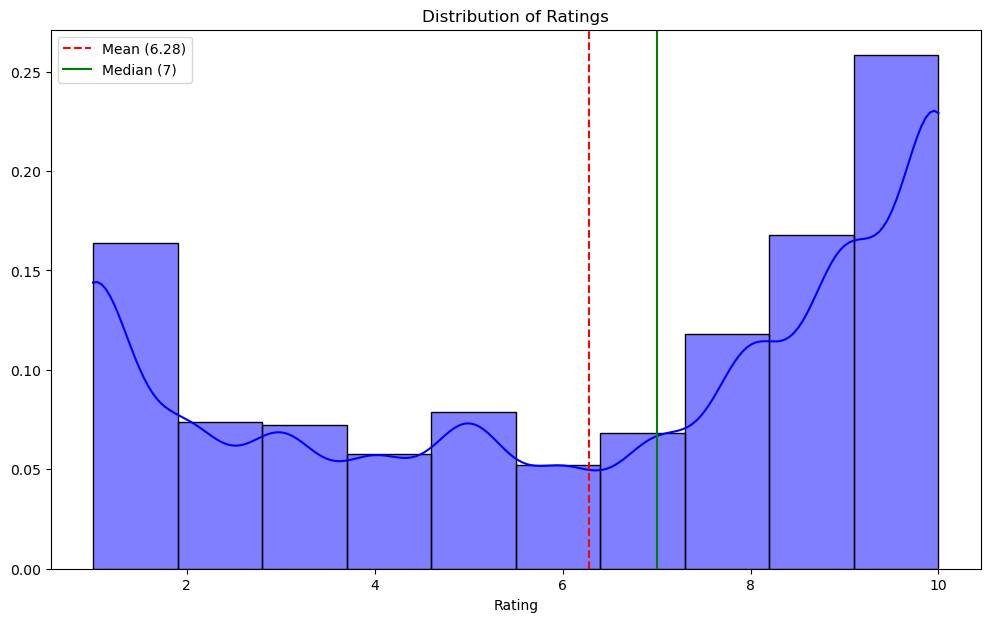

In [25]:
# Rating

plt.figure(figsize=(12, 7))

sns.histplot(filtered_df['rating'], bins=10, kde=True, color='blue', stat='density')

plt.axvline(x=filtered_df['rating'].mean(), color='red', linestyle='--', label='Mean (6.28)')
plt.axvline(x=filtered_df['rating'].median(), color='green', linestyle='-', label='Median (7)')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('')
plt.legend()
#plt.grid()



## usefulCount

- Range goes from 0 to 1247, indicating that some reviews received a high number of useful votes while others were not considered useful at all.
- Approximately 3.96% of reviews are deemed useful
- 75% of reviews received 9 or fewer useful votes, indicating that many reviews fall within a lower utility range
- High variability in useful votes suggests that reviews are perceived quite differently; some receive numerous useful votes while others do not, reflecting differences in quality, relevance, or style.

#I didn't create a graph because it's hard for me to explain it